In [22]:
# Importing all th required packages

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
import matplotlib.pyplot as plt
import random

In [23]:
# Loading the dataset from out local computer

X_train = np.loadtxt('input.csv',delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter = ',')
X_test = np.loadtxt('input_test.csv',delimiter = ',')
Y_test = np.loadtxt('labels_test.csv',delimiter = ',')

X_train = X_train/255.0
X_test = X_test/255.0

In [24]:
# Reshaping  the images to fit the neural network
# The image is made 100x100 px with 3 channels i.e R G B

X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

<function matplotlib.pyplot.show(close=None, block=None)>

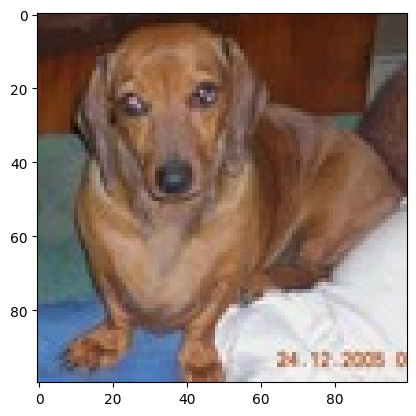

In [25]:
# Generating a random index for testing the model
# We can also provide images that are not part of the dataset

idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show

In [26]:
# Creating the model and adding all the layers
# Now-a-days, the practice is to add Input as a layer
# Hence the input layer is provided and shape is specified (100x100x3)

model = Sequential()

model.add(Input(shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [27]:
# Compiling the model

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [32]:
# The model reaches maximum accuracy of about 95-98 after 15 epochs
# So, it is recommended to either run this cell three times
# Or, directly run it for 15 epochs

model.fit(X_train,Y_train,epochs = 5,batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8929 - loss: 0.2645
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9259 - loss: 0.2078
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9262 - loss: 0.1876
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9363 - loss: 0.1736
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9522 - loss: 0.1355


In [33]:
# Model evaluation- The results are not very good
# For the results to be good, the dataset has to be much larger

model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6687 - loss: 0.9285


[0.8812695145606995, 0.6675000190734863]

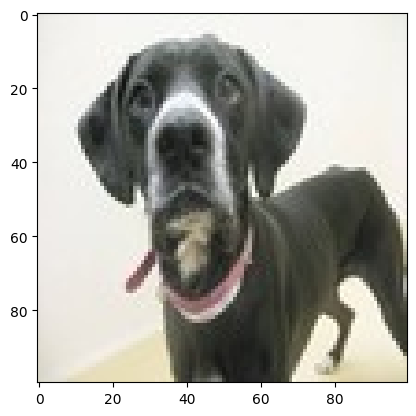

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
The animal is a  dog


In [35]:
# A simple logic is written for the classification
# The output is a value between 0 and 1
# This is because of the use of sigmoid function for classification
# If the y_pred > 0.5, it is a cat
# If not, it is a dog

idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

# This is the probabilistic value
y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred):
    pred = 'cat'
else:
    pred = 'dog'

print("The animal is a ",pred)